In [1]:
import pandas as pd

In [8]:
df = pd.read_csv("sales_data.csv", encoding='ISO-8859-1')


In [9]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [12]:
df.columns.unique

<bound method Index.unique of Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')>

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... ADDRESSLINE2  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...          NaN   
1    5/7/2003 0:00  Shipped       2         5     2003  ...          NaN   
2    7/1/2003 0:00  Shipped       3         7     2003  ...          NaN   
3   8/25/2003 0:00  Shipped       3         8     2003  ...          NaN   
4  10/10/2003 0:00  Shipped       4        10     2003  ...          NaN   

            CITY STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME  \
0            NYC    NY      10022     U

NameError: name 'highest_customer_satisfaction' is not defined

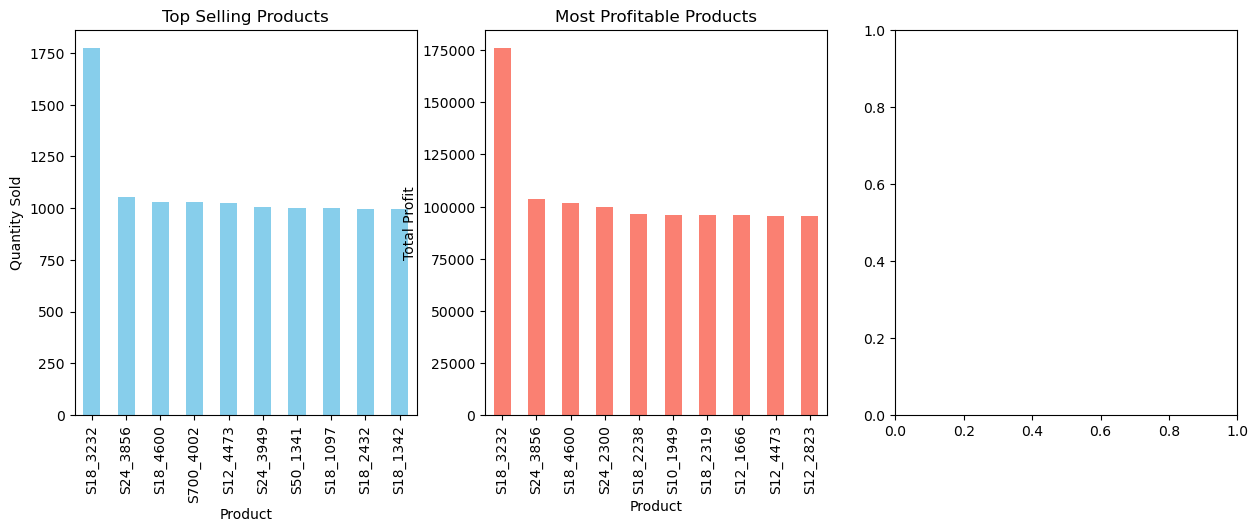

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first few rows of the dataset to understand its structure
print(df.head())

# Identify top-selling products
top_selling_products = df.groupby("PRODUCTCODE")["QUANTITYORDERED"].sum().sort_values(ascending=False).head(10)

# Identify most profitable products
df['Profit'] = df['PRICEEACH'] * df['QUANTITYORDERED']  # Assuming there's a 'Price' column
most_profitable_products = df.groupby('PRODUCTCODE')['Profit'].sum().sort_values(ascending=False).head(10)

# Identify products with the highest customer satisfaction
# Assuming there's a 'CustomerSatisfaction' column
#highest_customer_satisfaction = df.groupby('PRODUCTCODE')['CustomerSatisfaction'].mean().sort_values(ascending=False).head(10)

# Visualize the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')

plt.subplot(1, 3, 2)
most_profitable_products.plot(kind='bar', color='salmon')
plt.title('Most Profitable Products')
plt.xlabel('Product')
plt.ylabel('Total Profit')

plt.subplot(1, 3, 3)
highest_customer_satisfaction.plot(kind='bar', color='lightgreen')
plt.title('Products with Highest Customer Satisfaction')
plt.xlabel('Product')
plt.ylabel('Average Customer Satisfaction')

plt.tight_layout()
plt.show()


Question number 2

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.163

C:\Users\Faizan Jamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Faizan Jamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faizan Jamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Faizan Jamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

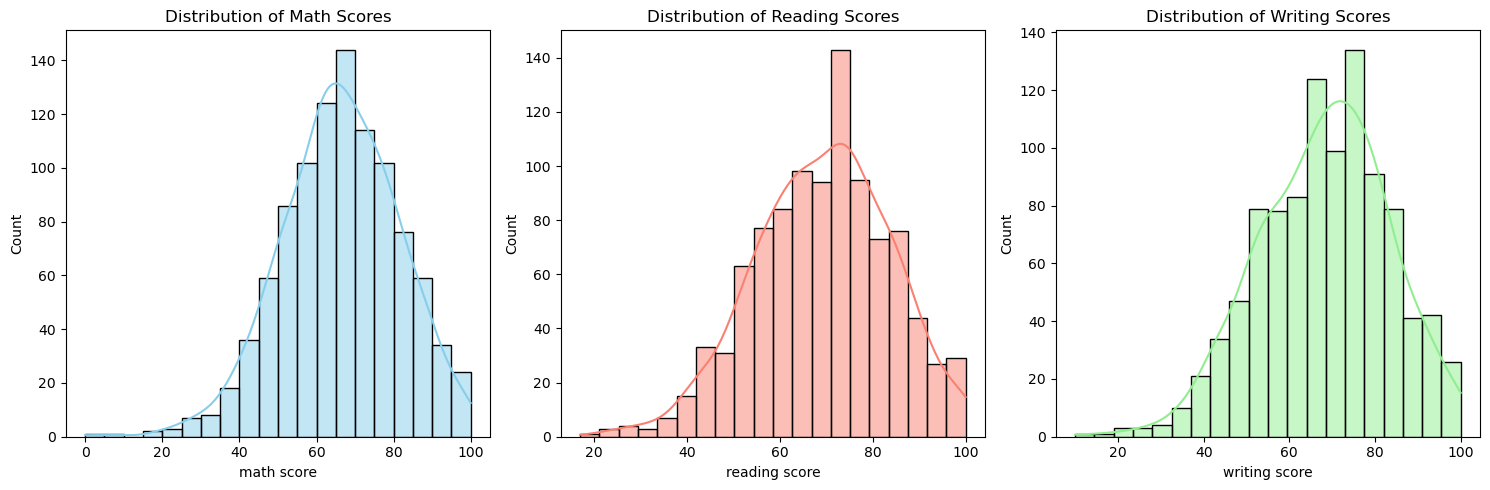

C:\Users\Faizan Jamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Faizan Jamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Faizan Jamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Faizan Jamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

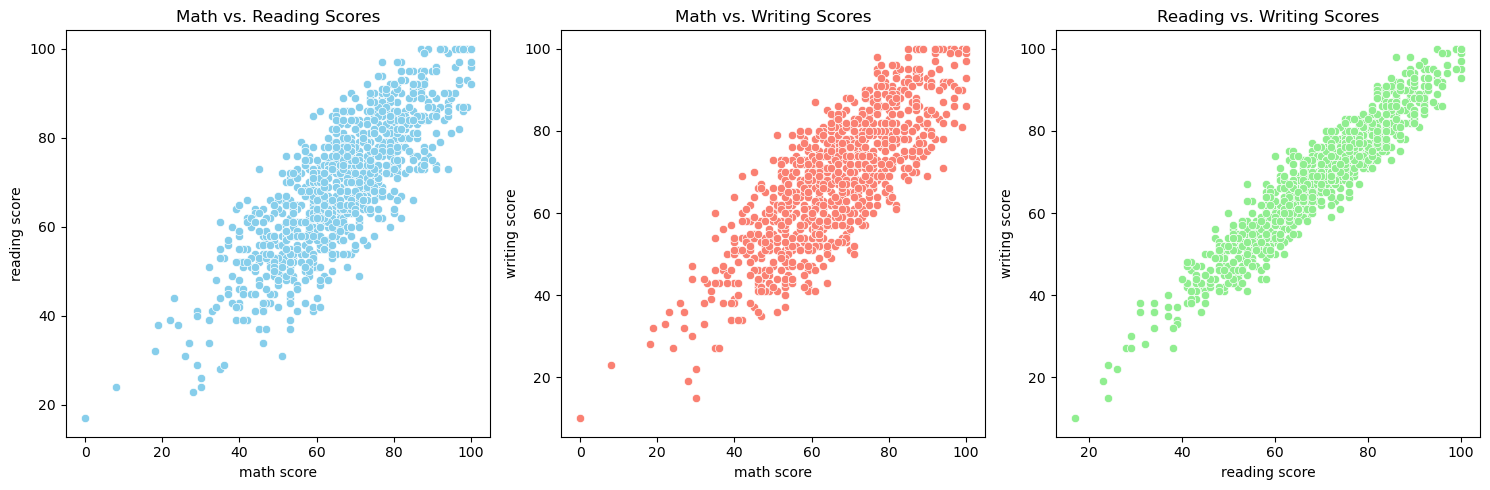

C:\Users\Faizan Jamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Faizan Jamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Faizan Jamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Faizan Jamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

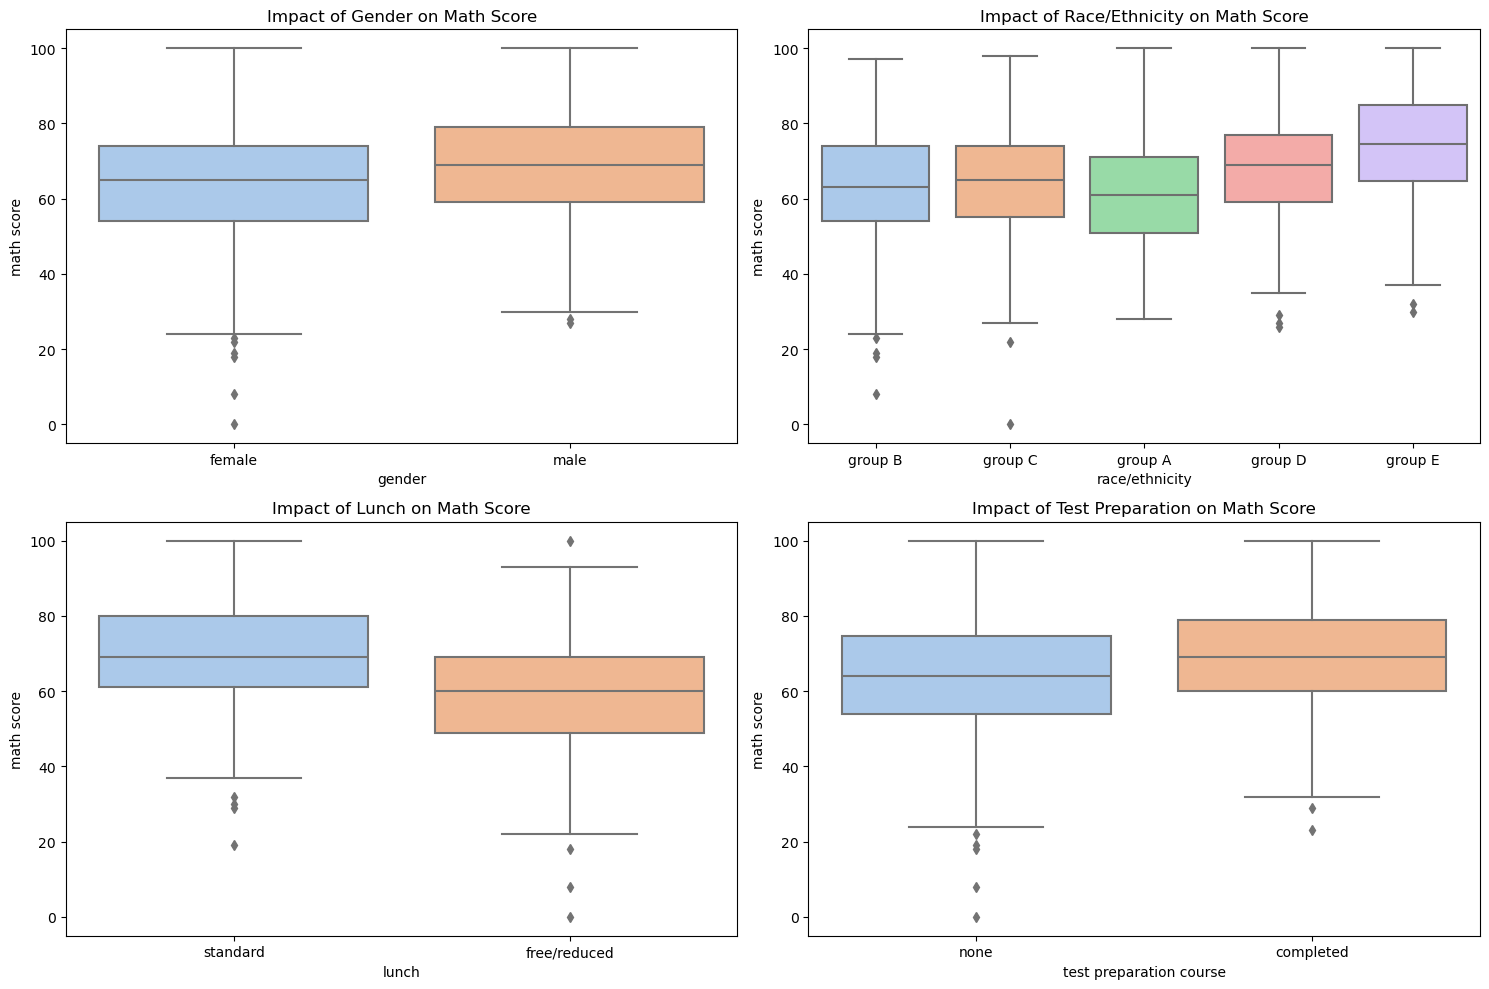

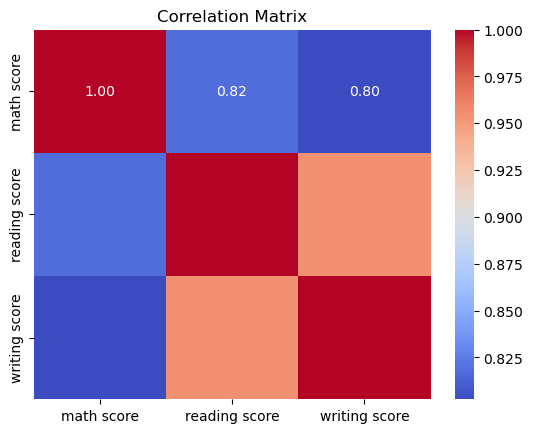

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Performance.csv")

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Summary statistics and information about the dataset
print(df.describe())
print(df.info())

# Visualize the distribution of scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['math score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Math Scores')

plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Reading Scores')

plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Writing Scores')

plt.tight_layout()
plt.show()

# Visualize the relationship between different variables
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='math score', y='reading score', data=df, color='skyblue')
plt.title('Math vs. Reading Scores')

plt.subplot(1, 3, 2)
sns.scatterplot(x='math score', y='writing score', data=df, color='salmon')
plt.title('Math vs. Writing Scores')

plt.subplot(1, 3, 3)
sns.scatterplot(x='reading score', y='writing score', data=df, color='lightgreen')
plt.title('Reading vs. Writing Scores')

plt.tight_layout()
plt.show()

# Analyze the impact of categorical variables (e.g., gender, race/ethnicity, parental education, lunch, test preparation)
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='gender', y='math score', data=df, palette='pastel')
plt.title('Impact of Gender on Math Score')

plt.subplot(2, 2, 2)
sns.boxplot(x='race/ethnicity', y='math score', data=df, palette='pastel')
plt.title('Impact of Race/Ethnicity on Math Score')

plt.subplot(2, 2, 3)
sns.boxplot(x='lunch', y='math score', data=df, palette='pastel')
plt.title('Impact of Lunch on Math Score')

plt.subplot(2, 2, 4)
sns.boxplot(x='test preparation course', y='math score', data=df, palette='pastel')
plt.title('Impact of Test Preparation on Math Score')

plt.tight_layout()
plt.show()

# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


plt.show()
